### PCA过程
由之前的理论依据，PCA过程可分为六步：  
- 去除平均值
- 计算散布矩阵或协方差矩阵，相差了一个$1/(N-1)$
- 计算协方差矩阵的特征值和特征向量
- 将特征值由大到小进行排序
- 选择前k个最大的特征值对应的特征向量，构造$d\times k$的投影矩阵W中
- 对每个数据点，执行降维变换 $y=W^Tx$  

### 实例编程
利用2个多元高斯分布生成40个三维数据点，这两个高斯分布的均值和协方差矩阵分别为：  

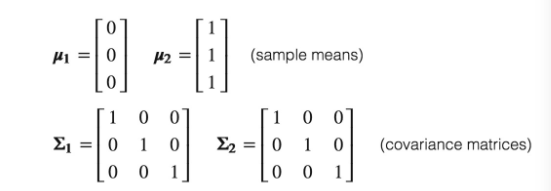

In [1]:
from IPython.display import Image
Image('/Users/shangshuhan/practice/14.png')

为什么用三维数据：  
三维数据可以可视化，降维到二维依旧可以。  
生成代码如下：  

In [9]:
import numpy as np

np.random.seed(42)

mu_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20).T
assert class1_sample.shape==(3,20),'The matrix has not the dimensions 3*20'


mu_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample=np.random.multivariate_normal(mu_vec2,cov_mat2,20).T
assert class2_sample.shape==(3,20),'The matrix has not the dimensions 3*20'

通过上述代码，我们生成了两个$3\times 20$的数据集，每个数据点都是三维列向量。  
可视化代码如下：

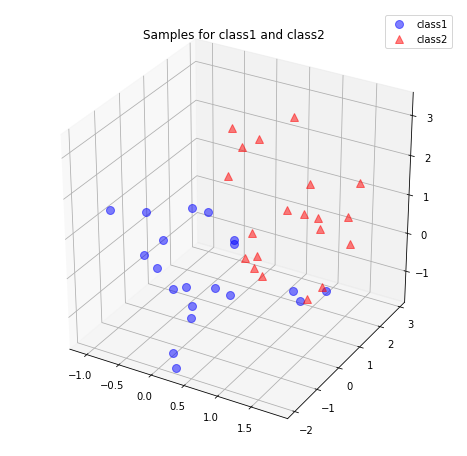

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d  

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
plt.rcParams['legend.fontsize']=10
ax.plot(class1_sample[0,:],class1_sample[1,:],class1_sample[2,:],'o',markersize=8,color='blue',alpha=0.5,label='class1')
ax.plot(class2_sample[0,:],class2_sample[1,:],class2_sample[2,:],'^',markersize=8,color='red',alpha=0.5,label='class2')

plt.title('Samples for class1 and class2')
ax.legend(loc='upper right')

plt.show()

### 去掉类别
忽略数据集的类别

In [19]:
all_samples=np.concatenate((class1_sample,class2_sample),axis=1)
assert all_samples.shape == (3,40) ,'The matrix has not the dimensions (3*40)'

### 计算d维均值

In [20]:
mean_x=np.mean(all_samples[0,:])
mean_y=np.mean(all_samples[1,:])
mean_z=np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('mean vector:\n',mean_vector)

mean vector:
 [[ 0.45587059]
 [ 0.46810083]
 [ 0.33852142]]


### 计算散布矩阵

In [21]:
scatter_matrix=np.zeros((3,3))

for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1)-mean_vector)*(all_samples[:,i].reshape(3,1)-mean_vector).T
print('Scatter_matrix:\n',scatter_matrix)

Scatter_matrix:
 [[ 22.16567148  12.53976465   2.79387084]
 [ 12.53976465  60.31432017  16.34412085]
 [  2.79387084  16.34412085  58.05790884]]


### 计算协方差矩阵

In [35]:
cov_mat=np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n',cov_mat)

Covariance Matrix:
 [[ 0.56835055  0.32153243  0.07163771]
 [ 0.32153243  1.54652103  0.41908002]
 [ 0.07163771  0.41908002  1.48866433]]


In [36]:
## covariance_matrix=scatter_matrix/(N-1)
scatter_matrix/39

array([[ 0.56835055,  0.32153243,  0.07163771],
       [ 0.32153243,  1.54652103,  0.41908002],
       [ 0.07163771,  0.41908002,  1.48866433]])

## 计算特征值和对应的特征向量  
为了验证‘对散布矩阵和协方差矩阵而言特征向量都是相同的’，我们用assert来试验一下，我们还可以将这个常数倍数(40-1=39)计算出来。

In [57]:
# from scatter matrix
eig_value_sc,eig_vector_sc=np.linalg.eig(scatter_matrix)
# from covariance matrix
eig_value_cov,eig_vector_cov=np.linalg.eig(cov_mat)

for i in range(len(eig_value_sc)):
    eigvec_sc=eig_vector_sc[:,i].reshape(1,3).T
    eigvec_cov=eig_vector_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all()==eigvec_cov.all(),'Eigenvectors are not identical'
    
    print('Eigenvector {}:\n{}'.format(i+1,eigvec_sc))
    print('Eigenvalue {} from scatter matrix :{}'.format(i+1,eig_value_sc[i]))
    print('Eigenvalue {} from covariance matrix :{}'.format(i+1,eig_value_cov[i]))
    
    print('Scaling factor:',eig_value_sc[i]/eig_value_cov[i])
    print(40*'-')

Eigenvector 1:
[-0.19917457]
Eigenvalue 1 from scatter matrix :77.8213933842646
Eigenvalue 1 from covariance matrix :1.9954203431862738
Scaling factor: 39.0
----------------------------------------
Eigenvector 2:
[ 0.30654625]
Eigenvalue 2 from scatter matrix :18.293626039055113
Eigenvalue 2 from covariance matrix :0.4690673343347471
Scaling factor: 39.0
----------------------------------------
Eigenvector 3:
[ 0.76517348]
Eigenvalue 3 from scatter matrix :44.42288106224649
Eigenvalue 3 from covariance matrix :1.1390482323652946
Scaling factor: 39.0
----------------------------------------


## 检查特征值和特征向量
快速腌制特征值和特征向量计算正确，也就是满足$\Sigma v=\lambda v$

In [45]:
for i in range(len(eig_value_sc)):
    eigv = eig_vector_sc[:,i].reshape(3,1)
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_value_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

## 可视化特征向量

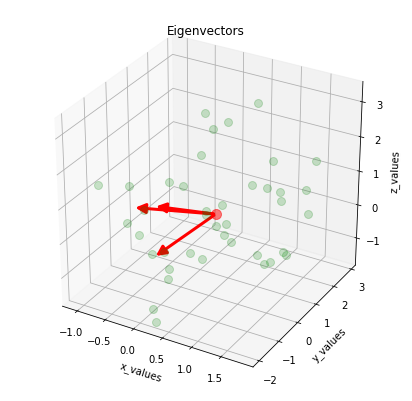

In [48]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
 
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
 
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
 
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
 
ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vector_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
 
plt.title('Eigenvectors')
 
plt.show()

## 排序特征向量
排序前可以先验证一下特征向量的长度是否为1

In [50]:
for ev in eig_vector_sc:
    np.testing.assert_array_almost_equal(1.0,np.linalg.norm(ev))

In [75]:
eig_pairs=[]
for x,y in zip(eig_value_sc,eig_vector_sc.T):
    eig_pairs.append([x,y])

77.821393384264596